<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 4</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 31, 2020</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Man Tik Li


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of data wrangling in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be at least 11 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comments.
2. Your method comments must mention the purpose of each parameter, and must be grammatically correct. 
3. When breaking up a long line, break it before an operator, not after. 

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

#### Question 1:

Download the dataset: `loan-applications.csv` and load it into a data frame. The data set contains several hundreds of loan application data. This data set provides a glimse of what bank and insurance companies facing during their data analyses. The goal is to automate the loan application process based on applicants' information. This data set contains many features of applicants, including: `Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others`. The main problem is that the data set contains missing values and different types of data. Here, you are asked to write code to clean and visualize the data and answer the following questions:
1. List the number of missing values for each column.
2. Remove the applications each of which has more than 2 missing values.
3. Forward fill up the missing values for columns with Object data type.
4. Fill up the missing values with their means for columns with numerical data types.
5. After the above steps, show that there are no missing data in the DataFrame.
6. Plot the relationship between Education and ApplicantIncome.
7. Plot the relationship between Property_Area and Loan_Status.
8. Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000).
9. Plot the relationship between Loan_Status and the categories of ApplicantIncome.
10. Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), and Rich(>20000).
11. Plot the relationship between Loan_Status and the categories of CoapplicantIncome. 
12. Develop plots to show the relationships between Load_Status and Education, Married, Credit_History. 
13. For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical categorical representations.

In [166]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
# Load loan datasets
loan_df = pd.read_csv("loan-applications.csv")

# List the number of missing values for all column'
loan_df.isnull().sum(axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
# Return top 5 rows
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [169]:
# Remove the applications each of which has more than 2 missing values
cols_missing = loan_df[loan_df.isnull().sum(axis = 1) < 2]

# Return data types. Three data types: object, int64, float64
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [170]:
# Forward fill up the missing values for columns with "Object" data type
for col in cols_missing:
    if(loan_df[col].dtype == "object"):
        loan_df[col].fillna(method = "ffill", inplace = True)
        
#Fill up the missing values with their means for columns with numerical data types.
    elif(loan_df[col].dtype == "int64" or loan_df[col].dtype == "float64"):
        loan_df[col].fillna(np.mean(loan_df[col]), inplace = True)
        

In [171]:
# To ensure there are no missing data in the DataFrame
print("The number or null values per column")
loan_df.isnull().sum(axis = 0)

The number or null values per column


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 720x432 with 0 Axes>

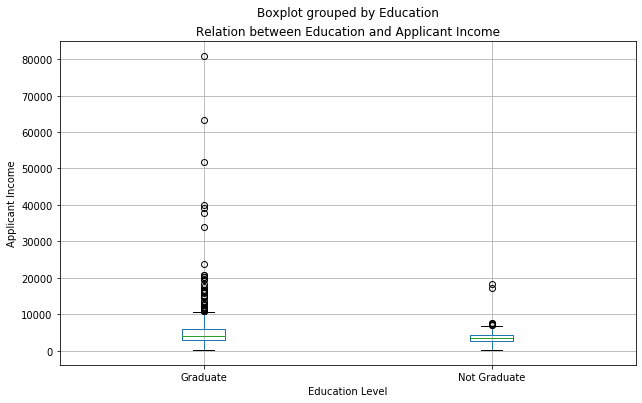

In [172]:
# Plot the relationship between Education and ApplicantIncome

# Set size of the chart
plt.figure(figsize = (10, 6))

# Produce a rectangular boxplot with data
loan_df[['ApplicantIncome', 'Education']].boxplot(column = 'ApplicantIncome', by ='Education', figsize = (10, 6))

# Set t
plt.title("Relation between Education and Applicant Income")

# Set y-axis label
plt.ylabel('Applicant Income')

# Set x-axis label
plt.xlabel('Education Level')

# Plot the chart
plt.tight_layout

Text(0.5, 1.0, 'Loan Status vs Property Area')

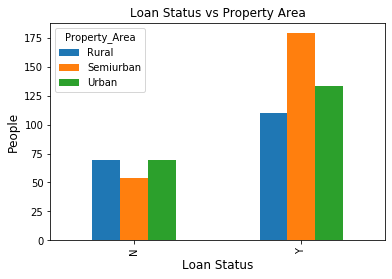

In [173]:
# Plot the relationship between Property_Area and Loan_Status
new = loan_df[['Loan_Status','Property_Area']]
grouped = new.groupby(['Loan_Status','Property_Area'])
grouped.size().unstack(fill_value=0).plot.bar()
plt.xlabel("Loan Status", fontsize = 12)
plt.ylabel("People", fontsize = 12)
plt.title("Loan Status vs Property Area")

In [174]:
# Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000)
cate_Coapp = [0, 2000, 20000, 50000, float('inf')]
range_Coapp = ['low', 'medium', 'high', 'rich']
newCategories = pd.cut(loan_df.CoapplicantIncome, cate_Coapp, labels = range_Coapp)
newCategories

0         NaN
1         low
2         NaN
3      medium
4         NaN
        ...  
609       NaN
610       NaN
611       low
612       NaN
613       NaN
Name: CoapplicantIncome, Length: 614, dtype: category
Categories (4, object): [low < medium < high < rich]

Text(0.5, 0, 'Income Range')

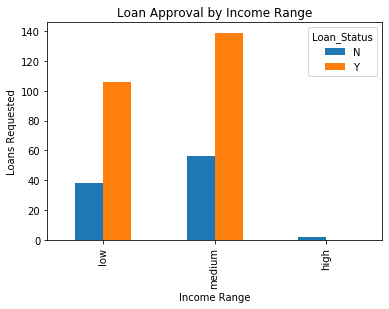

In [175]:
loan_df['ApplicantStatus'] = newCategories

#Plot the relationship between Loan_Status and the categories of ApplicantIncome.
axis1 = pd.crosstab(loan_df['ApplicantStatus'], loan_df['Loan_Status']).plot.bar()

# Set title
axis1.set_title('Loan Approval by Income Range')

# Set y-axis label
axis1.set_ylabel('Loans Requested')

# Set x-axis label
axis1.set_xlabel('Income Range')

In [176]:
# Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), and Rich(>20000).
CateCoapp = [0, 2000, 10000, 20000, float('inf')]
RangeCoapp = ['low', 'medium', 'High', 'Rich']
NewCoapp = pd.cut(loan_df.CoapplicantIncome, CateCoapp, labels = RangeCoapp)
NewCoapp

0         NaN
1         low
2         NaN
3      medium
4         NaN
        ...  
609       NaN
610       NaN
611       low
612       NaN
613       NaN
Name: CoapplicantIncome, Length: 614, dtype: category
Categories (4, object): [low < medium < High < Rich]

In [177]:
loan_df['Categorized_Coapplicant'] = NewCoapp
axis2 = pd.crosstab(loan_df['Categorized_Coapplicant'], loan_df['Loan_Status'])
axis2

Loan_Status,N,Y
Categorized_Coapplicant,,
low,38,106
medium,53,138
High,3,1
Rich,2,0


Text(0.5, 0, 'Income Range')

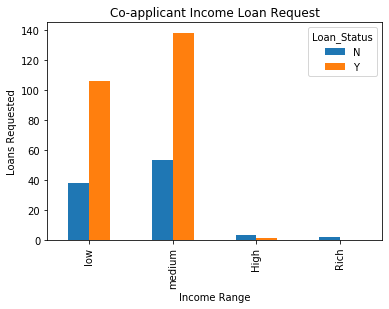

In [178]:
# Plot the relationship between Loan_Status and the categories of CoapplicantIncome
axis2 = pd.crosstab(loan_df['Categorized_Coapplicant'], loan_df['Loan_Status']).plot.bar()
axis2.set_title('Co-applicant Income Loan Request')
axis2.set_ylabel('Loans Requested')
axis2.set_xlabel('Income Range')

/Users/TIK_MONICA/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


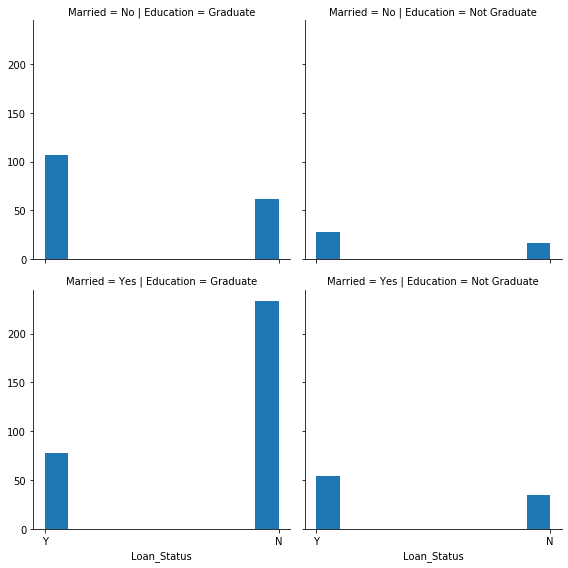

In [179]:
# Develop plots to show the relationships between Load_Status and Education, Married, Credit_History
lemc = sns.FacetGrid(loan_df, col = "Education", row = "Married", size = 4)
lemc = lemc.map(plt.hist, "Loan_Status")

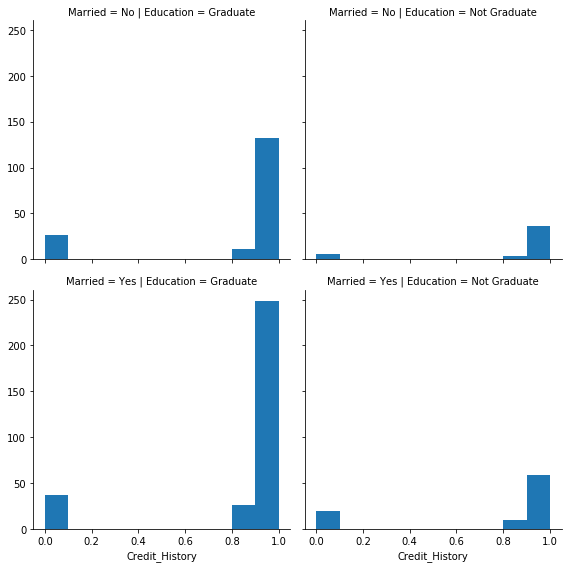

In [180]:
lemc = sns.FacetGrid(loan_df, col = "Education", row = "Married", size = 4)
lemc = lemc.map(plt.hist, "Credit_History")

In [188]:
# For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical categorical representations
loan_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [195]:
loan_df['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

In [191]:
loan_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [198]:
loan_df['Married'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [190]:
loan_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [199]:
loan_df['Dependents'].replace({'0':0, '1':1, '2':2, '3+':3}, inplace= True)

In [189]:
loan_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [200]:
loan_df['Education'].replace({'Graduate':1, 'Not Graduate': 0}, inplace= True)

In [192]:
loan_df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [201]:
loan_df['Self_Employed'].replace({'Yes':1, 'No': 0}, inplace= True)

In [196]:
loan_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [202]:
loan_df['Loan_Status'].replace({"Y":1,"N":0}, inplace= True)

In [197]:
loan_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [203]:
loan_df['Property_Area'].replace({'Urban':2, 'Semiurban': 1, 'Rural':0}, inplace= True)

In [204]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Loan_ID                  614 non-null    object  
 1   Gender                   614 non-null    int64   
 2   Married                  614 non-null    int64   
 3   Dependents               614 non-null    int64   
 4   Education                614 non-null    int64   
 5   Self_Employed            614 non-null    int64   
 6   ApplicantIncome          614 non-null    int64   
 7   CoapplicantIncome        614 non-null    float64 
 8   LoanAmount               614 non-null    float64 
 9   Loan_Amount_Term         614 non-null    float64 
 10  Credit_History           614 non-null    float64 
 11  Property_Area            614 non-null    int64   
 12  Loan_Status              614 non-null    int64   
 13  ApplicantStatus          341 non-null    category
 14  Categorize

#### Question 2:
Download the data set `imdb_1000.csv` and load it into a data frame. This data set contains rating information for about one thousand of movies. The following columns appear in the data set: `star_rating, title, content_rating, genre, duration, and actors_list`. Write code to clean and wrangle the data as instructed below:
- The actors_list column contains strings each of which should have three actor names. Extract the three actor names and add three new columns: `actor_1, actor_2, actor_3` in the data set. After the extraction, remove the column actors_list.

**Note**: There are sample kernels such as: [https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning](https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning) You can look at the existing kenerls to learn how other people accomplished. But your code must be different from existing ones. Plagiarism will not be tolerated as specified by Drexel Academic Honesty Rules and Procedures.

In [207]:
# Read dataset
movies_df = pd.read_csv("imdb_1000.csv")

# Return first 10 rows
movies_df.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [208]:
# Remove square bracket, u, and close quote
remove1 = lambda s: re.sub(r'u\'', '', s)
remove2 = lambda s: re.sub(r'\[', '', s)
remove3 = lambda s:re.sub(r'\]','',s)
remove4 = lambda s:re.sub(r'\'','',s)

# Splict list by comma and create an array for each actor
actors_split = lambda s:s.split(',')

In [211]:
actors = movies_df['actors_list'].map(remove1).map(remove2).map(remove3).map(remove4)

In [214]:
# Split actor list by string and place the actors into 3 columns for each movie
actors_df = pd.DataFrame(actors.map(actors_split).tolist(), columns =['actor1', 'actor2', 'actor3'])

In [217]:
# Add actors_df to movies
movies_df['actor1'] = actors_df['actor1']
movies_df['actor2'] = actors_df['actor2']
movies_df['actor3'] = actors_df['actor3']

# Drop actors list column
movies_df.drop(columns = ['actors_list'], inplace= True)

In [223]:
movies_df.head(20)

,star_rating,title,content_rating,genre,duration,actor1,actor2,actor3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson
5,8.9,12 Angry Men,NOT RATED,Drama,96,Henry Fonda,Lee J. Cobb,Martin Balsam
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,Clint Eastwood,Eli Wallach,Lee Van Cleef
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,Elijah Wood,Viggo Mortensen,Ian McKellen
8,8.9,Schindler's List,R,Biography,195,Liam Neeson,Ralph Fiennes,Ben Kingsley
9,8.9,Fight Club,R,Drama,139,Brad Pitt,Edward Norton,Helena Bonham Carter
